In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import pandas as pd


https://cloud.tencent.com/developer/article/1451545

In [23]:
dataset = pd.read_csv("C:/Users/24496/Desktop/BigData/wind_preprocessed.csv", header=0, index_col=0).query('day<14')
dataset

,power,speed,date.1,day,hour,minute,second,speed_moveavg,power_moveavg,speed_savgol_filter,power_savgol_filter
date,,,,,,,,,,,
2015-10-01 00:00:00,0.38065,0.39627,2015-10-01 00:00:00,1,0,0,0,0.39627,0.38065,0.39630,0.37963
2015-10-01 00:00:30,0.36943,0.39592,2015-10-01 00:00:30,1,0,0,30,0.39592,0.36943,0.39580,0.37350
2015-10-01 00:01:00,0.38529,0.39538,2015-10-01 00:01:00,1,0,1,0,0.39538,0.38529,0.39555,0.37919
2015-10-01 00:01:30,0.38892,0.39579,2015-10-01 00:01:30,1,0,1,30,0.39579,0.38892,0.39555,0.39443
2015-10-01 00:02:00,0.41220,0.39627,2015-10-01 00:02:00,1,0,2,0,0.39627,0.41220,0.39670,0.41116
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-13 23:57:30,0.19256,0.34645,2015-10-13 23:57:30,13,23,57,30,0.34645,0.19256,0.34587,0.19193
2015-10-13 23:58:00,0.19485,0.34559,2015-10-13 23:58:00,13,23,58,0,0.34559,0.19485,0.34594,0.19456
2015-10-13 23:58:30,0.19554,0.34562,2015-10-13 23:58:30,13,23,58,30,0.34562,0.19554,0.34539,0.19412


In [24]:
data = dataset[['speed_moveavg', 'power_moveavg']].rename(columns={'power_moveavg':'power', 'speed_moveavg':'speed'})
print(data.head())

                       speed    power
date                                 
2015-10-01 00:00:00  0.39627  0.38065
2015-10-01 00:00:30  0.39592  0.36943
2015-10-01 00:01:00  0.39538  0.38529
2015-10-01 00:01:30  0.39579  0.38892
2015-10-01 00:02:00  0.39627  0.41220


In [25]:
ddf = data[['power']]
ddf

,power
date,
2015-10-01 00:00:00,0.38065
2015-10-01 00:00:30,0.36943
2015-10-01 00:01:00,0.38529
2015-10-01 00:01:30,0.38892
2015-10-01 00:02:00,0.41220
...,...
2015-10-13 23:57:30,0.19256
2015-10-13 23:58:00,0.19485
2015-10-13 23:58:30,0.19554


In [26]:
dddf_train = ddf.iloc[:3*2880]
dddf_train

,power
date,
2015-10-01 00:00:00,0.38065
2015-10-01 00:00:30,0.36943
2015-10-01 00:01:00,0.38529
2015-10-01 00:01:30,0.38892
2015-10-01 00:02:00,0.41220
...,...
2015-10-03 23:57:30,0.45011
2015-10-03 23:58:00,0.45650
2015-10-03 23:58:30,0.46646


In [27]:
ddddf= []
for i in range(len(dddf_train)):
    ddddf.append(dddf_train.iloc[i,0])
ddddf
    

[0.38065,
 0.36943,
 0.38529,
 0.38892,
 0.4122,
 0.42277,
 0.40035,
 0.41485,
 0.41225,
 0.4024,
 0.39804,
 0.37576,
 0.39463,
 0.41636,
 0.41607,
 0.41616,
 0.40367,
 0.40117,
 0.39506,
 0.38497,
 0.39617,
 0.38003,
 0.39509,
 0.4133,
 0.42121,
 0.40457,
 0.3977,
 0.39169,
 0.42498,
 0.41577,
 0.40779,
 0.40262,
 0.3841,
 0.38777,
 0.3852,
 0.38359,
 0.37297,
 0.39178,
 0.39492,
 0.3902,
 0.39344,
 0.40677,
 0.40028,
 0.39906,
 0.37767,
 0.37376,
 0.37285,
 0.3872,
 0.36578,
 0.36333,
 0.36873,
 0.37599,
 0.38515,
 0.35806,
 0.37292,
 0.35059,
 0.35292,
 0.34622,
 0.3474,
 0.34181,
 0.35037,
 0.3378,
 0.3579,
 0.36732,
 0.37082,
 0.35184,
 0.36148,
 0.38594,
 0.38233,
 0.37403,
 0.3797,
 0.38682,
 0.36351,
 0.33953,
 0.34087,
 0.33675,
 0.34821,
 0.3573,
 0.35299,
 0.36989,
 0.38059,
 0.39519,
 0.3963,
 0.40038,
 0.39087,
 0.38642,
 0.39597,
 0.40579,
 0.39248,
 0.39151,
 0.38545,
 0.39444,
 0.40343,
 0.40777,
 0.42031,
 0.42415,
 0.41184,
 0.41687,
 0.40966,
 0.38686,
 0.38019,
 0.4

In [28]:
def split_sequence(sequence, sw_width, n_features):
    '''
    这个简单的示例，通过for循环实现有重叠截取数据，滑动步长为1，滑动窗口宽度为sw_width。
    
    '''
    X, y = [], []
    
    for i in range(len(sequence)):
        # 获取单个样本中最后一个元素的索引，因为python切片前闭后开，索引从0开始，所以不需要-1
        end_element_index = i + sw_width
        # 如果样本最后一个元素的索引超过了序列索引的最大长度，说明不满足样本元素个数，则这个样本丢弃
        if end_element_index > len(sequence) - 1:
            break
        # 通过切片实现步长为1的滑动窗口截取数据组成样本的效果
        seq_x, seq_y = sequence[i:end_element_index], sequence[end_element_index]
        
        X.append(seq_x)
        y.append(seq_y)
        
        process_X, process_y = np.array(X), np.array(y)
        process_X = process_X.reshape((process_X.shape[0], process_X.shape[1], n_features))
    
    print('split_sequence:\nX:\n{}\ny:\n{}\n'.format(np.array(X), np.array(y)))
    print('X_shape:{},y_shape:{}\n'.format(np.array(X).shape, np.array(y).shape))
    print('train_X:\n{}\ntrain_y:\n{}\n'.format(process_X, process_y))
    print('train_X.shape:{},trian_y.shape:{}\n'.format(process_X.shape, process_y.shape))
    return process_X, process_y


In [29]:
sw_width = 30
n_features = 1
epoch_num = 500
verbose_set = 1


In [30]:
train_X, train_y = split_sequence(ddddf, sw_width, n_features)

split_sequence:
X:
[[0.38065 0.36943 0.38529 ... 0.39169 0.42498 0.41577]
 [0.36943 0.38529 0.38892 ... 0.42498 0.41577 0.40779]
 [0.38529 0.38892 0.4122  ... 0.41577 0.40779 0.40262]
 ...
 [0.52893 0.51593 0.52808 ... 0.45952 0.45011 0.4565 ]
 [0.51593 0.52808 0.53433 ... 0.45011 0.4565  0.46646]
 [0.52808 0.53433 0.51624 ... 0.4565  0.46646 0.45001]]
y:
[0.40779 0.40262 0.3841  ... 0.46646 0.45001 0.43612]

X_shape:(8610, 30),y_shape:(8610,)

train_X:
[[[0.38065]
  [0.36943]
  [0.38529]
  ...
  [0.39169]
  [0.42498]
  [0.41577]]

 [[0.36943]
  [0.38529]
  [0.38892]
  ...
  [0.42498]
  [0.41577]
  [0.40779]]

 [[0.38529]
  [0.38892]
  [0.4122 ]
  ...
  [0.41577]
  [0.40779]
  [0.40262]]

 ...

 [[0.52893]
  [0.51593]
  [0.52808]
  ...
  [0.45952]
  [0.45011]
  [0.4565 ]]

 [[0.51593]
  [0.52808]
  [0.53433]
  ...
  [0.45011]
  [0.4565 ]
  [0.46646]]

 [[0.52808]
  [0.53433]
  [0.51624]
  ...
  [0.4565 ]
  [0.46646]
  [0.45001]]]
train_y:
[0.40779 0.40262 0.3841  ... 0.46646 0.45001 0.

In [31]:
# def oned_cnn_model(sw_width, n_features, X, y, epoch_num, verbose_set):
#     model = Sequential()
    
#     # 对于一维卷积来说，data_format='channels_last'是默认配置，该API的规则如下：
#     # 输入形状为：(batch, steps, channels)；输出形状为：(batch, new_steps, filters)，padding和strides的变化会导致new_steps变化
#     # 如果设置为data_format = 'channels_first'，则要求输入形状为： (batch, channels, steps).
#     model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
#                      strides=1, padding='valid', data_format='channels_last',
#                      input_shape=(sw_width, n_features)))
#     # 对于一维池化层来说，data_format='channels_last'是默认配置，该API的规则如下：
#     # 3D 张量的输入形状为: (batch_size, steps, features)；输出3D张量的形状为：(batch_size, downsampled_steps, features)
#     # 如果设置为data_format = 'channels_first'，则要求输入形状为：(batch_size, features, steps)
#     model.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', 
#                            data_format='channels_last')) 
    
#     # data_format参数的作用是在将模型从一种数据格式切换到另一种数据格式时保留权重顺序。默认为channels_last。
#     # 如果设置为channels_last，那么数据输入形状应为：（batch，…，channels）；如果设置为channels_first，那么数据输入形状应该为（batch，channels，…）
#     # 输出为（batch, 之后参数尺寸的乘积）
#     model.add(Flatten())
        
#     # Dense执行以下操作：output=activation（dot（input，kernel）+bias），
#     # 其中,activation是激活函数，kernel是由层创建的权重矩阵，bias是由层创建的偏移向量（仅当use_bias为True时适用）。
#     # 2D 输入：(batch_size, input_dim)；对应 2D 输出：(batch_size, units)
#     model.add(Dense(units=50, activation='relu',
#                 use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',))
    
#     # 因为要预测下一个时间步的值，因此units设置为1
#     model.add(Dense(units=1))
    
#     # 配置模型
#     model.compile(optimizer='adam', loss='mse',
#                  metrics=['accuracy'], loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
#     print('\n',model.summary())
#     # X为输入数据，y为数据标签；batch_size：每次梯度更新的样本数，默认为32。
#     # verbose: 0,1,2. 0=训练过程无输出，1=显示训练过程进度条，2=每训练一个epoch打印一次信息
    
#     history = model.fit(X, y, batch_size=32, epochs=epoch_num, verbose=verbose_set)

#     return model, history


In [32]:
X=train_X
y=train_y

In [33]:
# from keras.layers import  Dense,Dropout
# model = Sequential()
    
# # 对于一维卷积来说，data_format='channels_last'是默认配置，该API的规则如下：
# # 输入形状为：(batch, steps, channels)；输出形状为：(batch, new_steps, filters)，padding和strides的变化会导致new_steps变化
# # 如果设置为data_format = 'channels_first'，则要求输入形状为： (batch, channels, steps).
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
#                      strides=1, padding='valid', data_format='channels_last',
#                      input_shape=(sw_width, n_features)))
# model.add(Dropout((0.3)))

# model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
#                      strides=1, padding='valid', data_format='channels_last',
#                      input_shape=(sw_width, n_features)))



# # 对于一维池化层来说，data_format='channels_last'是默认配置，该API的规则如下：
# # 3D 张量的输入形状为: (batch_size, steps, features)；输出3D张量的形状为：(batch_size, downsampled_steps, features)
# # 如果设置为data_format = 'channels_first'，则要求输入形状为：(batch_size, features, steps)
# model.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', 
#                            data_format='channels_last')) 
    
# # data_format参数的作用是在将模型从一种数据格式切换到另一种数据格式时保留权重顺序。默认为channels_last。
# # 如果设置为channels_last，那么数据输入形状应为：（batch，…，channels）；如果设置为channels_first，那么数据输入形状应该为（batch，channels，…）
# # 输出为（batch, 之后参数尺寸的乘积）
     
# model.add(Flatten())

# # Dense执行以下操作：output=activation（dot（input，kernel）+bias），
# # 其中,activation是激活函数，kernel是由层创建的权重矩阵，bias是由层创建的偏移向量（仅当use_bias为True时适用）。
# # 2D 输入：(batch_size, input_dim)；对应 2D 输出：(batch_size, units)
# model.add(Dense(units=50, activation='relu',
#                 use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',))
# model.add(Dropout((0.5)))
# # 因为要预测下一个时间步的值，因此units设置为1
# model.add(Dense(units=1))
    
# # 配置模型
# model.compile(optimizer='adam', loss='mse',
#                   loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
# print('\n',model.summary())
# # X为输入数据，y为数据标签；batch_size：每次梯度更新的样本数，默认为32。
# # verbose: 0,1,2. 0=训练过程无输出，1=显示训练过程进度条，2=每训练一个epoch打印一次信息
    
# history = model.fit(X, y, batch_size=200, epochs=epoch_num, verbose=verbose_set,validation_split=0.3)

In [34]:
from keras.layers import  Dense,Dropout
model = Sequential()
    
# 对于一维卷积来说，data_format='channels_last'是默认配置，该API的规则如下：
# 输入形状为：(batch, steps, channels)；输出形状为：(batch, new_steps, filters)，padding和strides的变化会导致new_steps变化
# 如果设置为data_format = 'channels_first'，则要求输入形状为： (batch, channels, steps).
model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
                     strides=1, padding='valid', data_format='channels_last',
                     input_shape=(sw_width, n_features)))
model.add(Dropout((0.3)))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                     strides=1, padding='valid', data_format='channels_last',
                     input_shape=(sw_width, n_features)))

# model.add(Dropout((0.5)))

# model.add(Dense(units=50, activation='relu',
#                 use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',))

# 对于一维池化层来说，data_format='channels_last'是默认配置，该API的规则如下：
# 3D 张量的输入形状为: (batch_size, steps, features)；输出3D张量的形状为：(batch_size, downsampled_steps, features)
# 如果设置为data_format = 'channels_first'，则要求输入形状为：(batch_size, features, steps)
model.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', 
                           data_format='channels_last')) 
    
# data_format参数的作用是在将模型从一种数据格式切换到另一种数据格式时保留权重顺序。默认为channels_last。
# 如果设置为channels_last，那么数据输入形状应为：（batch，…，channels）；如果设置为channels_first，那么数据输入形状应该为（batch，channels，…）
# 输出为（batch, 之后参数尺寸的乘积）
     
model.add(Flatten())

# Dense执行以下操作：output=activation（dot（input，kernel）+bias），
# 其中,activation是激活函数，kernel是由层创建的权重矩阵，bias是由层创建的偏移向量（仅当use_bias为True时适用）。
# 2D 输入：(batch_size, input_dim)；对应 2D 输出：(batch_size, units)
model.add(Dense(units=50, activation='relu',
                use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',))
model.add(Dropout((0.5)))
# 因为要预测下一个时间步的值，因此units设置为1
model.add(Dense(units=1))
    
# 配置模型
model.compile(optimizer='adam', loss='mse',
                  loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
print('\n',model.summary())
# X为输入数据，y为数据标签；batch_size：每次梯度更新的样本数，默认为32。
# verbose: 0,1,2. 0=训练过程无输出，1=显示训练过程进度条，2=每训练一个epoch打印一次信息
    
history = model.fit(X, y, batch_size=250, epochs=epoch_num, verbose=verbose_set,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 64)            192       
                                                                 
 dropout_2 (Dropout)         (None, 29, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 27, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 832)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                41650     
                                                      

In [35]:
# model, history = oned_cnn_model(sw_width, n_features, train_X, train_y, epoch_num, verbose_set)


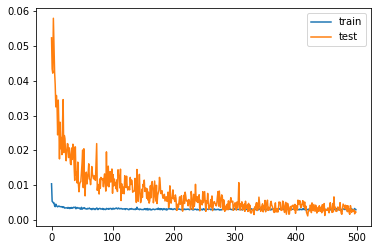

In [36]:
from matplotlib import pyplot as plt
# 绘制历史数据
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
# plt.title(f'Epochs={epoch_num}, Batch_size={batch_size},Ahead=400')
# plt.savefig(f'compare/{n}.png')
plt.legend()
plt.show()


In [37]:
dddf_test = ddf.iloc[5*2880:6*2880]
dddf_test

,power
date,
2015-10-06 00:00:00,0.68746
2015-10-06 00:00:30,0.72800
2015-10-06 00:01:00,0.71309
2015-10-06 00:01:30,0.69825
2015-10-06 00:02:00,0.68252
...,...
2015-10-06 23:57:30,0.09270
2015-10-06 23:58:00,0.08648
2015-10-06 23:58:30,0.08854


In [38]:
ddddf_t= []
for i in range(len(dddf_test)):
    ddddf_t.append(dddf_test.iloc[i,0])
ddddf_t
    

[0.68746,
 0.728,
 0.71309,
 0.69825,
 0.68252,
 0.69047,
 0.67625,
 0.671,
 0.6976,
 0.67295,
 0.63501,
 0.66718,
 0.65663,
 0.68215,
 0.72906,
 0.74436,
 0.73298,
 0.72747,
 0.73847,
 0.70842,
 0.72588,
 0.65577,
 0.70392,
 0.63512,
 0.65878,
 0.65215,
 0.67405,
 0.66271,
 0.68665,
 0.69695,
 0.67598,
 0.67886,
 0.68464,
 0.65966,
 0.7134,
 0.726,
 0.67905,
 0.75692,
 0.75098,
 0.74791,
 0.72611,
 0.75567,
 0.77255,
 0.78939,
 0.77447,
 0.85458,
 0.83936,
 0.81494,
 0.82221,
 0.85761,
 0.82366,
 0.8496,
 0.84461,
 0.85783,
 0.85417,
 0.86815,
 0.8329,
 0.86394,
 0.87596,
 0.85247,
 0.82905,
 0.84484,
 0.82899,
 0.82305,
 0.84435,
 0.83746,
 0.84378,
 0.84716,
 0.85118,
 0.82973,
 0.87737,
 0.83717,
 0.88963,
 0.87277,
 0.85819,
 0.83345,
 0.84271,
 0.87169,
 0.88524,
 0.91248,
 0.91741,
 0.94666,
 0.95184,
 0.92441,
 0.90464,
 0.88651,
 0.87977,
 0.89541,
 0.88915,
 0.89405,
 0.889,
 0.88357,
 0.86395,
 0.8145,
 0.82004,
 0.81908,
 0.81483,
 0.83655,
 0.86302,
 0.84923,
 0.85844,
 0.

In [39]:
test_X, test_y = split_sequence(ddddf_t, sw_width, n_features)

split_sequence:
X:
[[0.68746 0.728   0.71309 ... 0.66271 0.68665 0.69695]
 [0.728   0.71309 0.69825 ... 0.68665 0.69695 0.67598]
 [0.71309 0.69825 0.68252 ... 0.69695 0.67598 0.67886]
 ...
 [0.09913 0.10033 0.09662 ... 0.09039 0.0927  0.08648]
 [0.10033 0.09662 0.09461 ... 0.0927  0.08648 0.08854]
 [0.09662 0.09461 0.0978  ... 0.08648 0.08854 0.08421]]
y:
[0.67598 0.67886 0.68464 ... 0.08854 0.08421 0.08376]

X_shape:(2850, 30),y_shape:(2850,)

train_X:
[[[0.68746]
  [0.728  ]
  [0.71309]
  ...
  [0.66271]
  [0.68665]
  [0.69695]]

 [[0.728  ]
  [0.71309]
  [0.69825]
  ...
  [0.68665]
  [0.69695]
  [0.67598]]

 [[0.71309]
  [0.69825]
  [0.68252]
  ...
  [0.69695]
  [0.67598]
  [0.67886]]

 ...

 [[0.09913]
  [0.10033]
  [0.09662]
  ...
  [0.09039]
  [0.0927 ]
  [0.08648]]

 [[0.10033]
  [0.09662]
  [0.09461]
  ...
  [0.0927 ]
  [0.08648]
  [0.08854]]

 [[0.09662]
  [0.09461]
  [0.0978 ]
  ...
  [0.08648]
  [0.08854]
  [0.08421]]]
train_y:
[0.67598 0.67886 0.68464 ... 0.08854 0.08421 0.

In [40]:
y_pred_test = model.predict(test_X)
y_pred_test


90/90 [==============================] - 1s 4ms/step


array([[0.6522094 ],
       [0.6548877 ],
       [0.65322757],
       ...,
       [0.11132814],
       [0.11115643],
       [0.11021788]], dtype=float32)

In [41]:
y_i_pred_all = []
y_i_error = []
for i in range(len(test_X)):
    error = 0
    y_i_pred = model.predict(test_X[i])
    y_i_pred_all.append(y_i_pred)
    error = y_i_pred-test_y[i]
    y_i_error.append(error)
    break
y_i_error



InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/conv1d_2/Conv1D' defined at (most recent call last):
    File "c:\Users\24496\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "c:\Users\24496\Anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\24496\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
      app.start()
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
      self.io_loop.start()
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\24496\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
      self._run_once()
    File "c:\Users\24496\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
      handle._run()
    File "c:\Users\24496\Anaconda3\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
      user_expressions, allow_stdin,
    File "c:\Users\24496\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\24496\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
      return runner(coro)
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\24496\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-41-3c2ee2113efe>", line 5, in <module>
      y_i_pred = model.predict(test_X[i])
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\functional.py", line 459, in call
      inputs, training=training, mask=mask)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\24496\Anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 232, in convolution_op
      name=self.__class__.__name__)
Node: 'sequential_1/conv1d_2/Conv1D'
input must be 4-dimensional[1,30,1]
	 [[{{node sequential_1/conv1d_2/Conv1D}}]] [Op:__inference_predict_function_118891]

In [ ]:
y_i_pred_all

预测与实际差异RMSE: [0.39485808 0.39712424 0.40169604 ... 0.36960675 0.37286623 0.37320622]


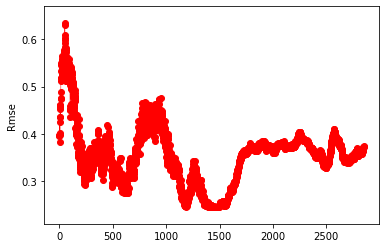

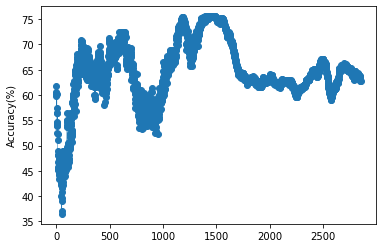

In [ ]:
#模型评估
a = (sum(pow((y_pred_test - test_y),2))/y_pred_test.shape[0])**0.5
print('预测与实际差异RMSE:',a)
t = np.arange(len(a))
# plt.figure(figsize=(18,6))
plt.scatter(t,a,color = 'r')
plt.plot(t, a,"-",color='r', linewidth=0.5)
plt.ylabel('Rmse')

# plt.plot(t, y_test_predict[40], 'go-', linewidth=1, label='Predict')
# plt.legend()
plt.show()
tt = [1 for i in range(2850)]
acc = (tt - a)*100
acc
plt.scatter(t,acc)
plt.plot(t, acc,"-", linewidth=0.5)
plt.ylabel('Accuracy(%)')
# plt.legend()
plt.show()
# print('预测与实际差异RMSE:',(sum(pow((y_test_predict - real_y),2))/y_test_predict.shape[0])**0.5)

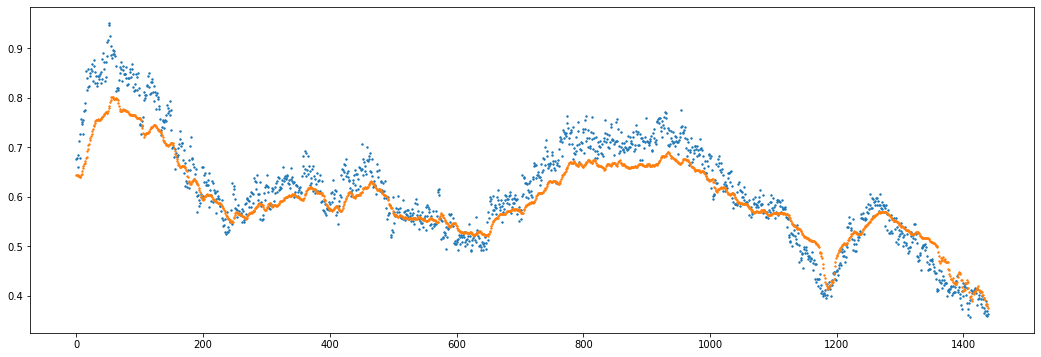

In [ ]:
t = np.arange(1440)
plt.figure(figsize=(18,6))
# plt.plot(t, test_y,"rs-", linewidth=0.7, label='Real')
plt.scatter(t,test_y[:1440],s=2)
plt.scatter(t,y_pred_test[:1440],s=2)
# plt.plot(t, y_pred_test, 'go-', linewidth=0.5, label='Predict')
# plt.legend()
plt.show()